In [1]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

#pd.set_option("display.max_rows", 100)

In [2]:
event_list = []
for file in os.listdir("./game_num_data/")[1:]:
    _df = pd.read_csv("./game_num_data/"+file, encoding="cp932", index_col=0, dtype="object")
    event_list += list(_df.values.flatten()) + ["GAMESET"]
    #if len(event_list) > 5193:
    #    print(file)

In [3]:
len(event_list)

39003

In [4]:
len(set(event_list))

26

In [5]:
double_transfer_list = []
for i in range(1, len(event_list)):
    before, after = event_list[i-1], event_list[i]
    if "GAMESET" in [before, after]:
        continue
    if before == "3000":
        continue
    double_transfer_list.append((before, after))

In [6]:
triple_transfer_list = []
for i in range(2, len(event_list)):
    before, curr, after = event_list[i-2], event_list[i-1], event_list[i]
    if "GAMESET" in [before, curr, after]:
        continue
    if before == "3000" or curr == "3000":
        continue
    triple_transfer_list.append((before, curr, after))

In [7]:
counter = Counter(triple_transfer_list)

In [8]:
sorted(list(counter.items()), key=lambda x: -x[1])

[(('0000', '1000', '2000'), 3506),
 (('1000', '2000', '3000'), 2545),
 (('0000', '1000', '1100'), 1104),
 (('1000', '2000', '2100'), 822),
 (('2000', '2100', '3000'), 604),
 (('0000', '0100', '1100'), 573),
 (('1100', '2100', '3000'), 516),
 (('0000', '0100', '1010'), 453),
 (('1000', '1100', '2100'), 424),
 (('0000', '1000', '1010'), 309),
 (('0000', '0100', '0110'), 302),
 (('2100', '2110', '3000'), 277),
 (('1010', '2010', '3000'), 273),
 (('1000', '1100', '1110'), 260),
 (('0100', '1100', '2100'), 251),
 (('1000', '2000', '2010'), 229),
 (('2000', '2100', '2110'), 217),
 (('0000', '0100', '2000'), 192),
 (('0100', '1010', '2010'), 191),
 (('1110', '2110', '3000'), 186),
 (('1000', '1100', '2010'), 176),
 (('2000', '2010', '3000'), 173),
 (('0000', '1000', '1000'), 166),
 (('1100', '2010', '3000'), 158),
 (('0000', '0000', '1000'), 151),
 (('2010', '2110', '3000'), 149),
 (('1100', '1110', '2110'), 147),
 (('1100', '2100', '2110'), 142),
 (('1000', '1010', '2010'), 135),
 (('1000', 

In [75]:
# 2アウト3塁
#ad_before = "2000" 
#dis_before = "1001" 
#after = "2001"

# 1アウト3塁
#ad_before = "1000" 
#dis_before = "0001" 
#after = "1001"

# 2アウト2塁
#ad_before = "2000" 
#dis_before = "1010" 
#after = "2010"

# 1アウト2塁
#ad_before = "1000" 
#dis_before = "0010" 
#after = "1010"

# 2アウト1塁
#ad_before = "2000" 
#dis_before = "1100" 
#after = "2100"

# 1アウト1塁
#ad_before = "1000"
#dis_before = "0100"
#after = "1100"

In [76]:
ad = pd.DataFrame(sorted([[elem[0][0], elem[0][1], elem[0][2], elem[1]] for elem in list(Counter([elem for elem in triple_transfer_list if elem[0]==ad_before and elem[1]==after]).items())], key=lambda x: -x[-1]))

In [77]:
dis = pd.DataFrame(sorted([[elem[0][0], elem[0][1], elem[0][2], elem[1]] for elem in list(Counter([elem for elem in triple_transfer_list if elem[0]==dis_before and elem[1]==after]).items())], key=lambda x: -x[-1]))

In [78]:
ad[4] = ad[3] / sum(ad[3])
dis[4] = dis[3] / sum(dis[3])

In [79]:
ad

,0,1,2,3,4
0,1000,1001,2001,11,0.289474
1,1000,1001,1100,9,0.236842
2,1000,1001,1101,8,0.210526
3,1000,1001,2000,5,0.131579
4,1000,1001,1010,2,0.052632
5,1000,1001,1001,1,0.026316
6,1000,1001,1000,1,0.026316
7,1000,1001,3000,1,0.026316


In [80]:
dis

,0,1,2,3,4
0,0001,1001,2001,9,0.333333
1,0001,1001,2000,7,0.259259
2,0001,1001,1100,6,0.222222
3,0001,1001,1101,3,0.111111
4,0001,1001,1010,1,0.037037
5,0001,1001,1000,1,0.037037


In [81]:
def decode_count(count):
    out = count[0]
    base = list(count[1:])
    out_comment = str(out) + "アウト"
    if out_comment == "3アウト":
        return out_comment + "チェンジ"
    if base == ["0", "0", "0"]:
        return out_comment + "ランナーなし"
    elif base == ["1", "1", "1"]:
        return out_comment + "満塁"
    base = [elem=="1" for elem in base]
    base_comment = ""
    for i in range(3):
        if base[i]:
            base_comment += str(i+1)
    return out_comment + base_comment + "塁"

/Users/konoharuki/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


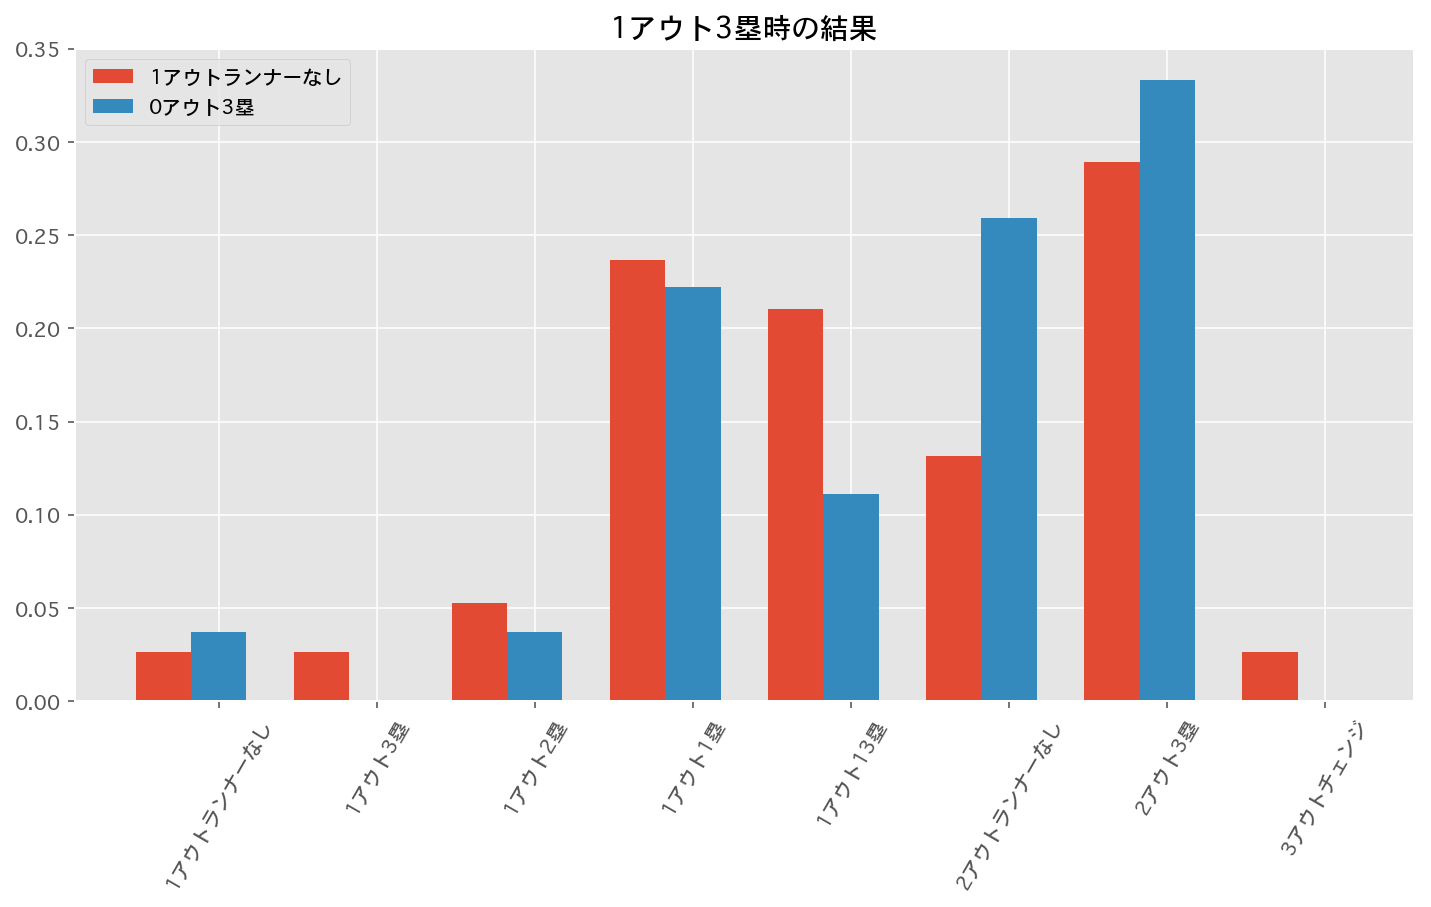

In [82]:
con = pd.concat([ad.set_index(2), dis.set_index(2)], axis=1, join="outer").fillna(0)[4]
con.columns = ["ad_rate", "dis_rate"]

plt.figure(figsize=(12, 6))
plt.bar(list(range(len(con.ad_rate))), con.ad_rate, tick_label=[decode_count(elem) for elem in con.index], width=0.35, align="center")
plt.bar(np.array(list(range(len(con.dis_rate))))+0.35, con.dis_rate, tick_label=[decode_count(elem) for elem in con.index], width=0.35, align="center")
plt.xticks(rotation=60)
plt.legend([decode_count(ad[0][0]), decode_count(dis[0][0])])
plt.title(decode_count(ad[1][0]) + "時の結果")
plt.show()

In [83]:
con = pd.concat([ad.set_index(2), dis.set_index(2)], axis=1, join="outer").fillna(0)[[3, 4]]
con.columns = ["ad_num", "dis_num", "ad_rate", "dis_rate"]
con["ad_num"] = con["ad_num"].astype(int)
con["dis_num"] = con["dis_num"].astype(int)
con["pvalue"] = [stats.ttest_ind(d1, d2).pvalue for d1, d2 in zip([[0] * (con["ad_num"].sum() - con["ad_num"][idx]) + [1] * con["ad_num"][idx] for idx in con.index], [[0] * (con["dis_num"].sum() - con["dis_num"][idx]) + [1] * con["dis_num"][idx] for idx in con.index])]
con.index = [decode_count(elem) for elem in con.index]

/Users/konoharuki/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [84]:
con.sort_values(by="pvalue")

,ad_num,dis_num,ad_rate,dis_rate,pvalue
2アウトランナーなし,5,7,0.131579,0.259259,0.196827
1アウト13塁,8,3,0.210526,0.111111,0.299546
1アウト3塁,1,0,0.026316,0.000000,0.403530
3アウトチェンジ,1,0,0.026316,0.000000,0.403530
2アウト3塁,11,9,0.289474,0.333333,0.711064
1アウト2塁,2,1,0.052632,0.037037,0.772079
1アウトランナーなし,1,1,0.026316,0.037037,0.808838
1アウト1塁,9,6,0.236842,0.222222,0.892456


In [49]:
def test(x_mean, y_mean, x_num, y_num, p_est, alpha=0.005):
    z = 1.96
    print(abs(x_mean - y_mean) / (((x_num+y_num)/(x_num*y_num))*p_est*(1-p_est))**0.5)
    if abs(x_mean - y_mean) > z * (((x_num+y_num)/(x_num*y_num))*p_est*(1-p_est))**0.5:
        return "significant"
    else:
        return "insignificant"

In [86]:
idx = 2
x_mean = ad[4][idx]
y_mean = dis[4][idx]
x_num = ad[3].sum()
y_num = dis[3].sum()
p_est = (x_mean + y_mean) / 2
test(x_mean, y_mean, x_num, y_num, p_est)

0.112847966224


'insignificant'

In [87]:
# 連続進塁は適合的にpositiveな影響をもたらすのか、それともギャンブラーの錯誤的にnegativeな影響をもたらすのか

In [88]:
prev_out = 0
max_len = 0
curr_len = 0
idx = 0
max_idx = 0
lst = []
max_lst = []
for out in [elem[0] for elem in event_list]:
    idx += 1
    if out == "G":
        continue
    if prev_out == out:
        curr_len += 1
        lst.append(out)
    else:
        if max_len < curr_len:
            max_len = curr_len
            max_idx = idx
            max_lst = lst
        lst = []
        curr_len = 0
    prev_out = out

In [89]:
max_len

11

In [90]:
max_lst

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [91]:
max_idx

4166

In [97]:
event_list[max_idx-max_len-2: max_idx]

['0000',
 '0100',
 '0110',
 '0111',
 '0110',
 '0101',
 '0000',
 '0010',
 '0110',
 '0110',
 '0111',
 '0011',
 '1010']